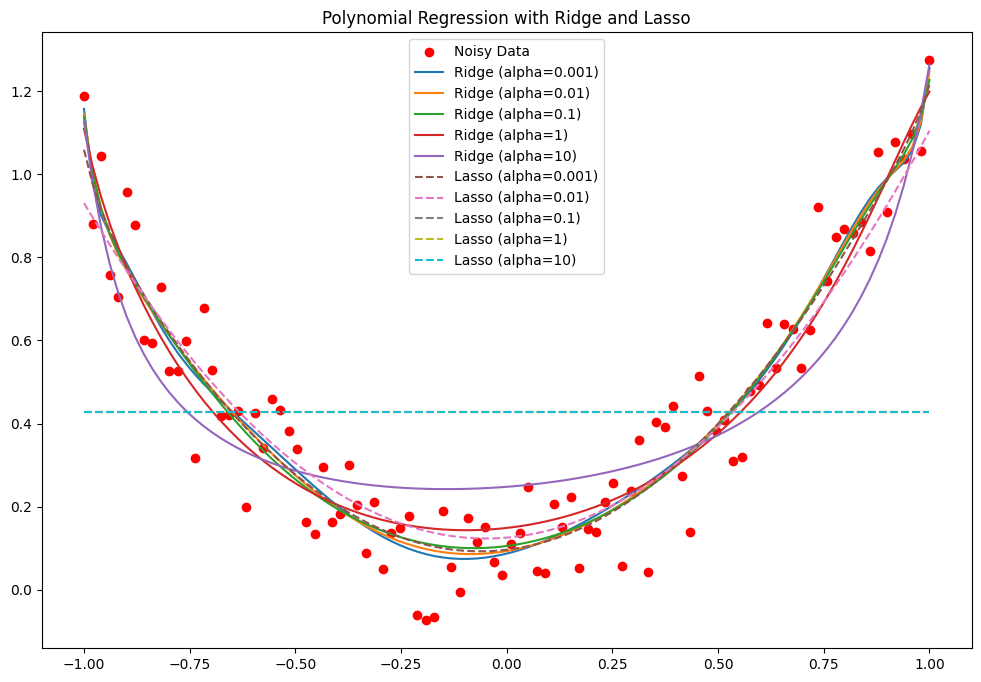

Ridge MSE:
Alpha: 0.001, MSE: 0.008887770728939063
Alpha: 0.01, MSE: 0.009111458337805295
Alpha: 0.1, MSE: 0.009301828035441112
Alpha: 1, MSE: 0.01078160844988799
Alpha: 10, MSE: 0.02204543452645163

Lasso MSE:
Alpha: 0.001, MSE: 0.009401125873853057
Alpha: 0.01, MSE: 0.011124968943861464
Alpha: 0.1, MSE: 0.10695627007313811
Alpha: 1, MSE: 0.10695627007313811
Alpha: 10, MSE: 0.10695627007313811


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate data
x = np.linspace(-1, 1, 100)
beta = [.1, .1, 1]
tnoisy = beta[0] + beta[1]*x + beta[2]*x**2 + np.random.normal(0, .1, len(x))

# Reshape x to be a 2D array
x = x.reshape(-1, 1)

# 1. Generate polynomial features with a higher degree
degree = 30  # Increased degree for more complex fitting
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(x)

# 2. Apply Ridge and Lasso regression with different values of alpha
alphas = [0.001, 0.01, 0.1, 1, 10]  # Different alpha values to try

# Initialize dictionaries to store predictions and MSE
ridge_predictions = {}
lasso_predictions = {}
ridge_mse = {}
lasso_mse = {}

# Predict on the test set
xtest = np.linspace(-1, 1, 100).reshape(-1, 1)
X_polytest = poly_features.transform(xtest)

# Ridge regression for different alpha values
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_poly, tnoisy)
    ridge_predictions[alpha] = ridge.predict(X_polytest)
    # Calculate MSE on test data
    ridge_mse[alpha] = mean_squared_error(tnoisy, ridge.predict(X_poly))

# Lasso regression for different alpha values
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_poly, tnoisy)
    lasso_predictions[alpha] = lasso.predict(X_polytest)
    # Calculate MSE on test data
    lasso_mse[alpha] = mean_squared_error(tnoisy, lasso.predict(X_poly))

# 3. Plot the results
plt.figure(figsize=(12, 8))

# Plot the original noisy data
plt.scatter(x, tnoisy, c='r', label='Noisy Data')

# Plot Ridge predictions for different alpha values
for alpha in alphas:
    plt.plot(xtest, ridge_predictions[alpha], label=f'Ridge (alpha={alpha})')

# Plot Lasso predictions for different alpha values
for alpha in alphas:
    plt.plot(xtest, lasso_predictions[alpha], '--', label=f'Lasso (alpha={alpha})')

plt.legend()
plt.title('Polynomial Regression with Ridge and Lasso')
plt.show()

# 4. Print the MSE for each alpha
print("Ridge MSE:")
for alpha, mse in ridge_mse.items():
    print(f"Alpha: {alpha}, MSE: {mse}")

print("\nLasso MSE:")
for alpha, mse in lasso_mse.items():
    print(f"Alpha: {alpha}, MSE: {mse}")
